In [2]:
import sys
import requests
import json
import re
import time
import datetime
from datetime import date

import pandas as pd
import numpy as np


In [3]:
numrecords = 5

In [4]:
## Get data from taxicab api

url = 'https://data.cityofnewyork.us/id/2yzn-sicd.json?$limit=%s' %(numrecords)
resp = requests.get(url)
results = json.loads(resp.text)

In [5]:
# check that results brought back the expected number of records (should == numrecords)

len(results)

5

In [6]:
## generate Trips DataFrame

TripsDF = pd.DataFrame(list(results))
TripsDF.head(3)


,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,imp_surcharge,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2015-08-02T01:01:59.000,40.773345947265625,-73.948089599609375,0.5,16,0.3,0.5,1,1,2015-08-02T00:46:11.000,40.752010345458984,-74.004844665527344,1,N,3.46,0,20.76,4.8,1
1,2015-08-24T09:48:46.000,40.762149810791016,-73.972213745117188,0,8,0.3,0.5,5,2,2015-08-24T09:40:05.000,40.766460418701172,-73.9539794921875,1,N,0,0,8.8,1.43,2
2,2015-08-04T15:53:32.000,40.770393371582031,-73.96435546875,0,11.5,0.3,0.5,1,1,2015-08-04T15:37:16.000,40.751499176025391,-73.975486755371094,1,N,1.5,0,13.8,1.5,1


In [7]:
#Assigning correct datatypes
TripsDF["dropoff_datetime"] = pd.to_datetime(TripsDF["dropoff_datetime"],infer_datetime_format=True)
TripsDF["pickup_datetime"] = pd.to_datetime(TripsDF["pickup_datetime"],infer_datetime_format=True)
TripsDF["passenger_count"] = pd.to_numeric(TripsDF["passenger_count"])
TripsDF['trip_distance'] = TripsDF['trip_distance'].astype('float64')
TripsDF['tip_amount'] = TripsDF['tip_amount'].astype('float64')
TripsDF['pickup_latitude'] = TripsDF['pickup_latitude'].astype('float64') 
TripsDF['pickup_longitude'] = TripsDF['pickup_longitude'].astype('float64') 
TripsDF['dropoff_latitude'] = TripsDF['dropoff_latitude'].astype('float64') 
TripsDF['dropoff_longitude'] = TripsDF['dropoff_longitude'].astype('float64') 

In [9]:
odd = TripsDF.loc[TripsDF.pickup_longitude==0, ['pickup_longitude', 'pickup_latitude']]
odd
TripsDF= TripsDF.drop(odd.index)

In [10]:


l = []
k = []

q = []
r = []
s = []

t = []
u = []
v = []

for i in TripsDF.index:

    ## add dropoffinfo column to Trips dataframe:

    dropoff_latitude = TripsDF.loc[i, 'dropoff_latitude']
    dropoff_longitude = TripsDF.loc[i, 'dropoff_longitude']
    try:
        dropoff_url2 = "http://data.fcc.gov/api/block/find?format=json&latitude=%s&longitude=%s&showall=true" %(dropoff_latitude,dropoff_longitude)
        dropoff_resp2 = requests.get(dropoff_url2)
        dropoff_results2 = json.loads(dropoff_resp2.text)
        dropoffinfo = dropoff_results2["Block"]["FIPS"][2:11]
    except:
        dropffinfo="000000000"
            

    ## add pickupinfo column to Trips dataframe:
    
    pickup_latitude = TripsDF.loc[i, 'pickup_latitude']
    pickup_longitude = TripsDF.loc[i, 'pickup_longitude']
    try:
        pickup_url2 = "http://data.fcc.gov/api/block/find?format=json&latitude=%s&longitude=%s&showall=true" %(pickup_latitude,pickup_longitude)
        pickup_resp2 = requests.get(pickup_url2)
        pickup_results2 = json.loads(pickup_resp2.text)
        pickupinfo = pickup_results2["Block"]["FIPS"][2:11]
    except:
        pickupinfo="000000000"

    
    l.append(dropoffinfo)
    k.append(pickupinfo)


    try:
        dropofftract = dropoffinfo[3:9]
        dropoffcounty = dropoffinfo[0:3]
        pickuptract = pickupinfo[3:9]
        pickupcounty = pickupinfo[0:3]
        
        print(dropofftract,dropoffcounty,pickuptract,pickupcounty)

    #add pickup parameters

        tract = pickuptract
        county = pickupcounty

        ## pickup_pop
        try:
            variablename = "PCT0120001"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            pop = results3[1][0] 

            q.append(pop)
        except:
            q.append(None)

        ## pickup_male
        try:

            variablename = "PCT0120002"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            male = results3[1][0] 

            r.append(male)
        except:
            r.append(None)

        ## pickup_avghh
        try:
            variablename = "P0170001"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            avghh = results3[1][0] 

            s.append(avghh)
        except:
            s.append(None)
        
        #add dropoff parameters

        tract = dropofftract
        county = dropoffcounty

        ## dropoff_pop
        try:
            variablename = "PCT0120001"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            pop = results3[1][0] 

            t.append(pop)
        except:
            t.append(None)

        ## dropoff_male
        try:

            variablename = "PCT0120002"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            male = results3[1][0] 

            u.append(male)
        except:
            u.append(None)

        ## dropoff_avghh
        try:
            variablename = "P0170001"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            avghh = results3[1][0] 

            v.append(avghh)
        except:
            v.append(None)
    
    except:
        k.append(None)
        l.append(None)
        q.append(None)
        r.append(None)
        s.append(None)
        t.append(None)
        u.append(None)
        v.append(None)

    
TripsDF['pickupinfo'] = k
TripsDF['dropoffinfo'] = l

TripsDF['pickup_pop'] = q
TripsDF['pickup_male'] = r
TripsDF['pickup_avghh'] = s

TripsDF['dropoff_pop'] = t
TripsDF['dropoff_male'] = u
TripsDF['dropoff_avghh'] = v


####  with thanks to user on stackoverflow:
#### https://stackoverflow.com/questions/43750016/getting-specific-data-values-out-of-a-dataframe-python-pandas



013600 061 009900 061
011202 061 012400 061
013000 061 009200 061
114700 081 033100 081
005600 061 012100 061


In [11]:
## scroll to the right to see the new Census data columns

TripsDF.head(5)

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,...,trip_distance,vendor_id,pickupinfo,dropoffinfo,pickup_pop,pickup_male,pickup_avghh,dropoff_pop,dropoff_male,dropoff_avghh
0,2015-06-15 12:57:18,40.763279,-73.992828,0,5.5,0.5,1,1,2015-06-15 12:52:34,40.756920,...,0.90,1,061009900,061012900,1945,1002,1.62,6038,3432,1.72
1,2015-05-18 20:24:08,40.752293,-73.992882,0.5,11,0.5,1,2,2015-05-18 20:09:18,40.731419,...,2.01,2,061005900,061010900,5401,2476,1.61,183,82,1.59
2,2015-02-13 09:14:26,40.752003,-73.976936,0,9.5,0.5,1,2,2015-02-13 09:00:35,40.755207,...,0.76,2,061011300,061009200,117,72,1.18,1806,882,1.48
3,2015-02-13 18:45:12,40.775608,-73.983459,1,12,0.5,1,1,2015-02-13 18:27:27,40.762711,...,1.93,2,061013300,061015300,6208,3302,1.74,9320,4294,1.75
4,2015-02-09 17:01:54,40.756252,-74.002899,1,11,0.5,2,2,2015-02-09 16:48:14,40.760010,...,2.30,1,061010200,061009900,230,126,1.58,1945,1002,1.62


In [12]:
## scroll down to see the size of the data stored
TripsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 999
Data columns (total 26 columns):
dropoff_datetime      982 non-null datetime64[ns]
dropoff_latitude      982 non-null float64
dropoff_longitude     982 non-null float64
extra                 982 non-null object
fare_amount           982 non-null object
mta_tax               982 non-null object
passenger_count       982 non-null int64
payment_type          982 non-null object
pickup_datetime       982 non-null datetime64[ns]
pickup_latitude       982 non-null float64
pickup_longitude      982 non-null float64
rate_code             982 non-null object
store_and_fwd_flag    982 non-null object
tip_amount            982 non-null object
tolls_amount          982 non-null object
total_amount          982 non-null object
trip_distance         982 non-null float64
vendor_id             982 non-null object
pickupinfo            982 non-null object
dropoffinfo           982 non-null object
pickup_pop            982 non-null 

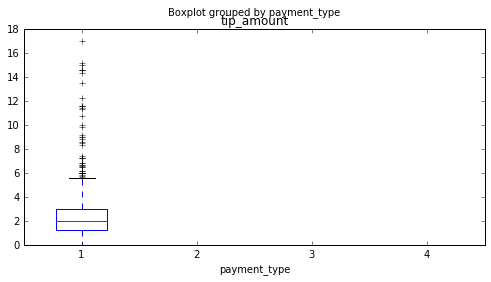

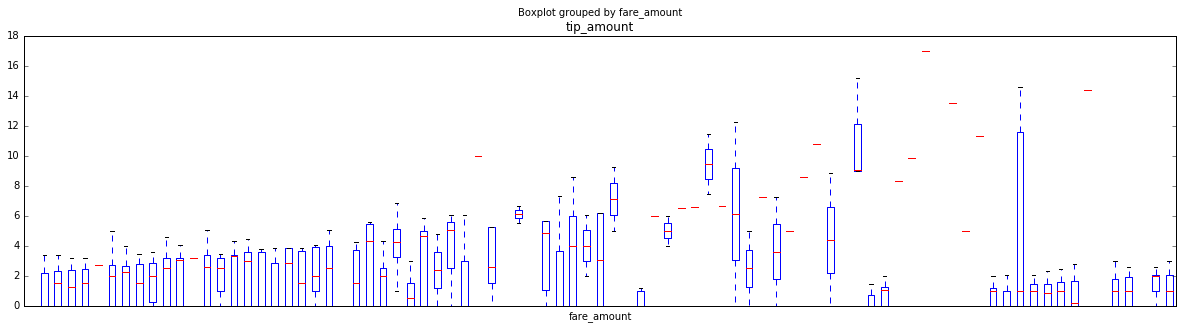

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

## here is a boxplot comparing tips for cash payment versus non-cash payment

bp = TripsDF.boxplot(column='tip_amount', by='payment_type', grid=False, figsize=(8,4))
for i in [0,1,2]:
    y = TripsDF.tip_amount[TripsDF.payment_type==i].dropna()
    # The below is an idiom to create a list of len(y) size, all filled with the value i
    x = [i] * len(y)

   
bp2 = TripsDF.boxplot(widths=0.5, sym='',column='tip_amount', by='fare_amount', figsize = (20,5), grid=False)
for i in [0,1,2]:
    y=TripsDF.tip_amount[TripsDF.fare_amount==i].dropna()
    x = [i] * len(y)
    plt.xticks(x,TripsDF.fare_amount)

#     plt.plot(x,y,'r.',alpha=0.3)
#     #     plt.plot(x, y, 'r.', alpha=0.3)
# #     TripsDF.plot.area(x = 'payment_type', y = 'tip_amount')




In [48]:
TripsDF['pickup_avghh'] = TripsDF['pickup_avghh'].astype('float64')
TripsDF['dropoff_avghh'] = TripsDF['dropoff_avghh'].astype('float64')

TripsDF['passenger_count'] = TripsDF['passenger_count'].astype('float64')
TripsDF['pickup_pop'] = TripsDF['pickup_pop'].astype('float64')
TripsDF['dropoff_pop'] = TripsDF['dropoff_pop'].astype('float64')


TripsDF['pickup_male'] = TripsDF['pickup_male'].astype('float64')
TripsDF['pickup_malepercent'] = TripsDF['pickup_male']/TripsDF['pickup_pop']



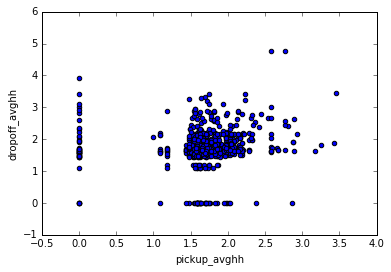

In [37]:
TripsDF.plot.scatter(x='pickup_avghh', y='dropoff_avghh');

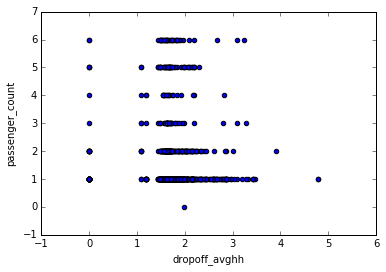

In [39]:
TripsDF.plot.scatter(x='dropoff_avghh', y='passenger_count');

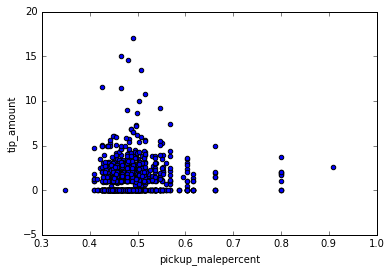

In [52]:
TripsDF.plot.scatter(x='pickup_malepercent', y='tip_amount');